# Excercise 2a: Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

In [4]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

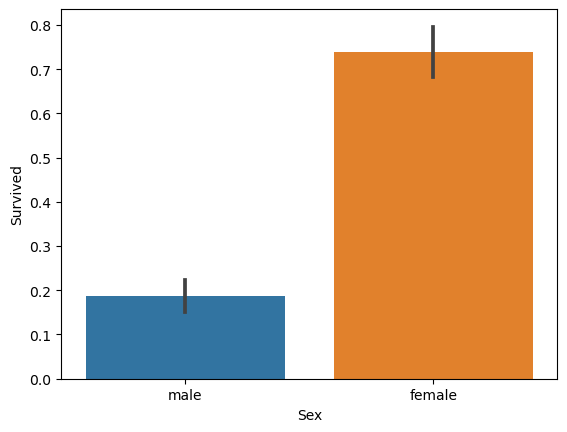

In [4]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes, the first-class passengers had a higher survical rate. For isntance, by beein a first-class passanger you was almost three times as like to survive as a third-class passanger. 

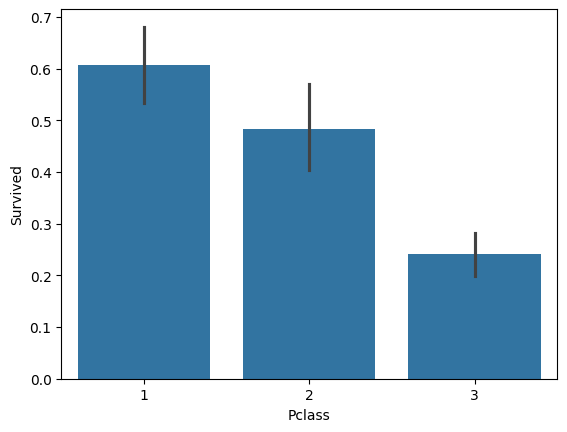

In [6]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

# Question 2: Is survival related to Embarked?

Answer: Yes. By embarking at Cherbourg you had a higher survival rate (about 55%) than both Queenstown and Southampton who had aproximately the same survival rate (about 35%)

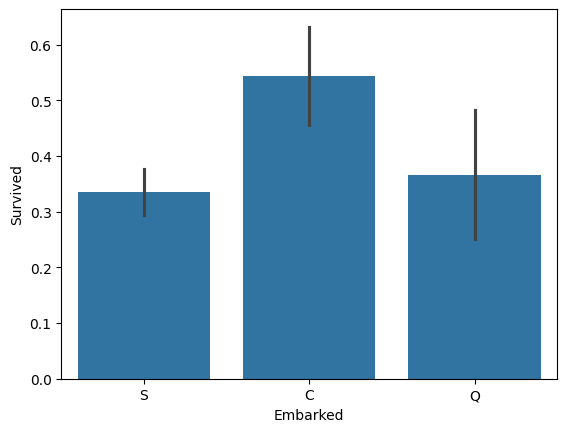

In [11]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(y="Survived", x="Embarked", data=data)
plt.show()

# Question 3: How is age related to survival?

Answer: You can see that people below 18 had a much higher chance of surviving than not surviving. The opsitite is true for people from 18 to about 35 and for people from 65 to 80.

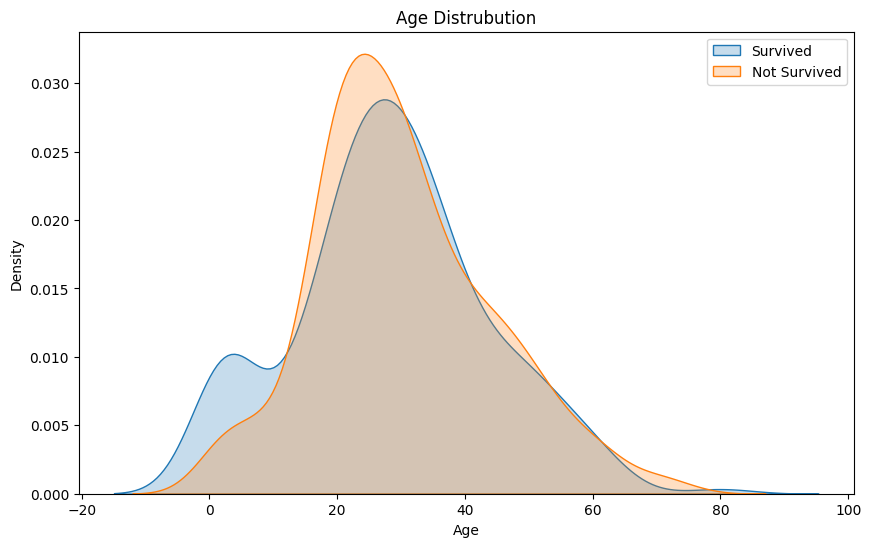

In [38]:
# Show the relevant statistics or visualization(s) to support your answer
plt.figure(figsize=(10, 6))
sns.kdeplot(data.loc[data['Survived'] == 1, 'Age'], label='Survived', fill=True)
sns.kdeplot(data.loc[data['Survived'] == 0, 'Age'], label='Not Survived', fill=True)
plt.title('Age Distrubution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

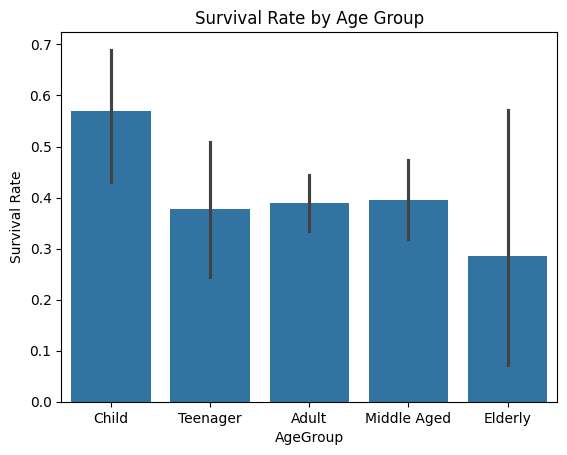

In [35]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Middle Aged', 'Elderly'])
sns.barplot(x='AgeGroup', y='Survived', data=data)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()


# Question 4: Does family size somehow affect the survival rate?

Answer: Small families (2-4 members), particulary those with children or few siblings, had a much better chance of survival compared to those traveling alone or with larger family groups

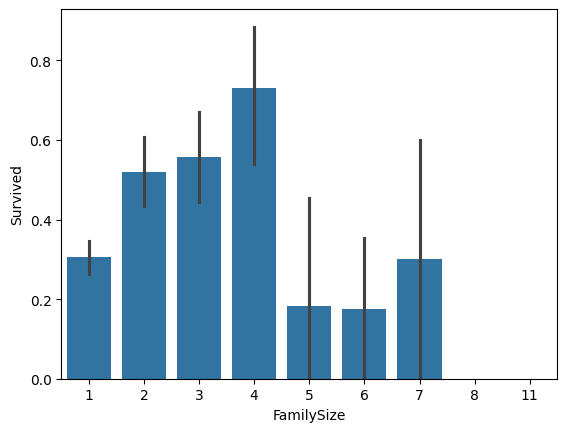

In [40]:
# Show the relevant statistics or visualization(s) to support your answer
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

sns.barplot(x='FamilySize', y='Survived', data=data)
plt.show()

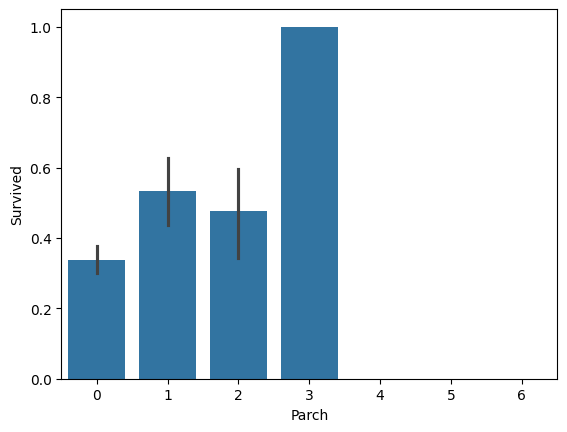

In [41]:
sns.barplot(x='Parch', y='Survived', data=data)
plt.show()

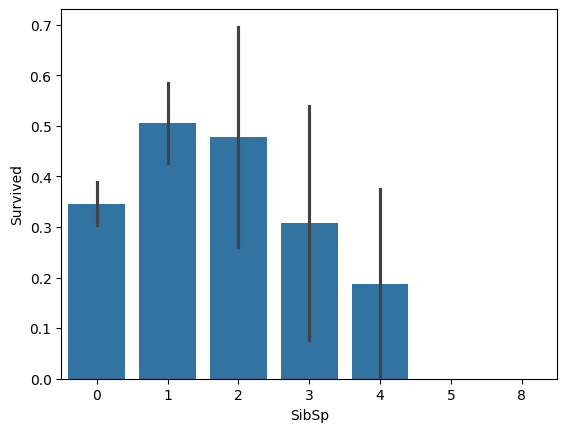

In [42]:
sns.barplot(x='SibSp', y='Survived', data=data)
plt.show()

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Yes. Beeing a woman, espacially a married woman, seems to be getting you a much higher survival rate than a man. The same goes for "Master"(a child). A man with a title like "Dr.", "Col" or "Major" had a significantly higher chance of survival than a normal man ("Mr.").

In [43]:
# Show the relevant statistics or visualization(s) to support your answer
data['Title'] = data['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,AgeGroup,FamilySize,Title
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0,Middle Aged,1,Mr
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0,Adult,1,Mr
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0,Adult,1,Mr
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0,Adult,2,Mr
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0,Child,7,Miss


In [46]:
unique_titles = data['Title'].unique()
unique_titles

array(['Mr', 'Miss', 'Major', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Mlle',
       'Capt', 'Mme', 'Ms', 'Countess', 'Lady'], dtype=object)

In [54]:
counts = data["Title"].value_counts()
counts

Title
Mr          419
Miss        147
Mrs          96
Master       33
Rev           5
Dr            5
Major         2
Col           2
Capt          1
Countess      1
Lady          1
Name: count, dtype: int64

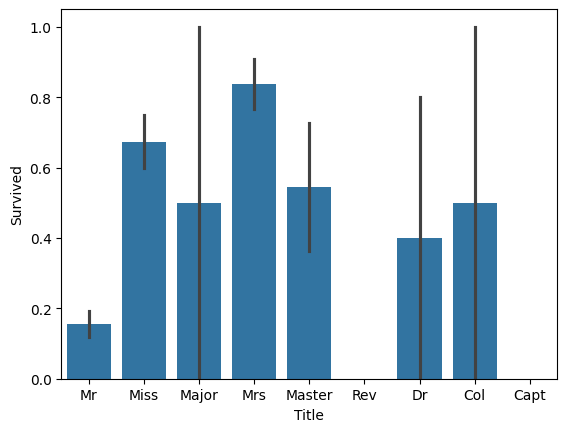

In [55]:
data['Title'] = data['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss') ## aproximately the same title
data['Title'] = data['Title'].replace(['Lady', 'Countess'], 'Mrs') ## aproximately the same title

sns.barplot(x='Title', y='Survived', data=data)
plt.show()
